In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
df = pd.read_csv('/data/1_ObesityDataSet_raw_and_data_sinthetic.csv')

In [54]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [55]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [57]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [58]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [59]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Since  some rows of Age include float values, we are changing the float values to integers.

In [60]:
df['Age'] = df['Age'].apply(np.int64)

In [61]:
df['Age']

0       21
1       21
2       23
3       27
4       22
        ..
2106    20
2107    21
2108    22
2109    24
2110    23
Name: Age, Length: 2111, dtype: int64

#### Checking for outliers

In [62]:
df_numeric = df[['Age', 'Height', 'Weight','FCVC','NCP', 'CH2O', 'FAF', 'TUE']]

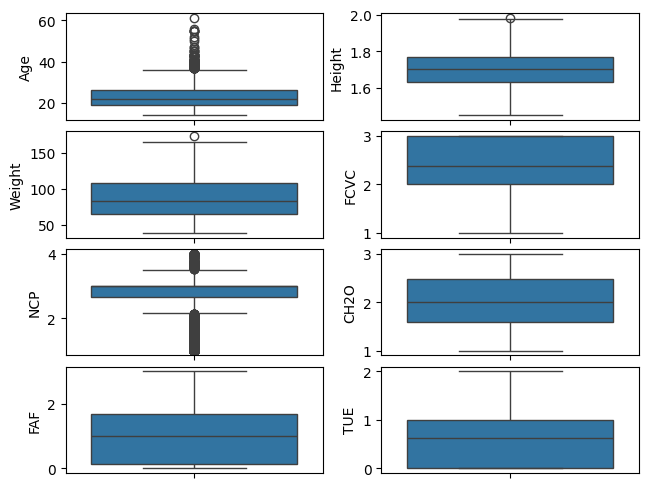

In [63]:
col_list = df_numeric.columns

idx=0
for i in col_list:
  idx+=1
  plt.subplot(4,2,idx)
  sns.boxplot(y = i , data = df_numeric)
  plt.tight_layout(pad = 0.4, w_pad = 0.5)

**As seen in the boxplots above, the age column has some outliers, however, age between** 
**40-60 is not necessarily outliers. Therefore, outliers in age column does not need much** 
**treatment. Further, all other columns except for NCP do not have outliers.**

In [64]:
df['Age'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [65]:
df['Age_Group'] = pd.qcut(df['Age'], q=4)

In [66]:
df['Age_Group'].value_counts()

Age_Group
(19.0, 22.0]      569
(22.0, 26.0]      545
(13.999, 19.0]    537
(26.0, 61.0]      460
Name: count, dtype: int64

In [67]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Age_Group
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,"(19.0, 22.0]"
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,"(19.0, 22.0]"
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,"(22.0, 26.0]"
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,"(26.0, 61.0]"
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,"(19.0, 22.0]"


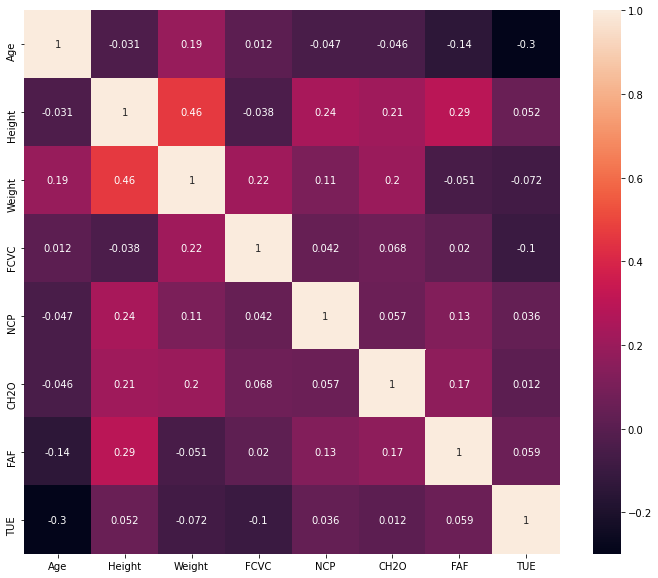

In [17]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot= True)

#### Since, the Age and TUE features illustrate high correlation in the above heatmap, we can drop the TUE feature.

In [68]:
df.drop(['TUE'], axis=1,inplace=True)

## Scaling and Encoding the data

In [69]:
from sklearn.preprocessing import  MinMaxScaler
mn=MinMaxScaler()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   object  
 1   Age                             2111 non-null   int64   
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   object  
 5   FAVC                            2111 non-null   object  
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   object  
 9   SMOKE                           2111 non-null   object  
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   object  
 12  FAF                 

In [72]:
df[['Age']] = mn.fit_transform(df[['Age']])
df[['Weight']] = mn.fit_transform(df[['Weight']])
df[['FCVC']] = mn.fit_transform(df[['FCVC']])
df[['NCP']] = mn.fit_transform(df[['NCP']])
df[['CH2O']] = mn.fit_transform(df[['CH2O']])
df[['FAF']] = mn.fit_transform(df[['FAF']])

In [78]:
df_standardized = df[['Age', 'Weight', 'FCVC', 'NCP','CH2O', 'FAF']]

In [79]:
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']

In [80]:
print(df_unique)

                          Variable  DistinctCount
0                           Gender              2
1                              Age             40
2                           Height           1574
3                           Weight           1525
4   family_history_with_overweight              2
5                             FAVC              2
6                             FCVC            810
7                              NCP            635
8                             CAEC              4
9                            SMOKE              2
10                            CH2O           1268
11                             SCC              2
12                             FAF           1190
13                            CALC              4
14                          MTRANS              5
15                      NObeyesdad              7
16                       Age_Group              4


In [81]:
df_onehotencoded = pd.get_dummies(df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", 'NObeyesdad','Age_Group']])

In [82]:
df2 = pd.concat([df_standardized, df_onehotencoded], axis=1)

In [83]:
df2.head()

,Age,Weight,FCVC,NCP,CH2O,FAF,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,"Age_Group_(13.999, 19.0]","Age_Group_(19.0, 22.0]","Age_Group_(22.0, 26.0]","Age_Group_(26.0, 61.0]"
0,0.148936,0.186567,0.5,0.666667,0.5,0.000000,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
1,0.148936,0.126866,1.0,0.666667,1.0,1.000000,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
2,0.191489,0.283582,0.5,0.666667,0.5,0.666667,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
3,0.276596,0.358209,1.0,0.666667,0.5,0.666667,False,True,True,False,...,False,False,False,False,True,False,False,False,False,True
4,0.170213,0.379104,0.5,0.000000,0.5,0.000000,False,True,True,False,...,False,False,False,False,False,True,False,True,False,False


##### Since Columns Gender, family_history_with_overweight, FAVC, SMOKE and SCC have only two categories, we can use the binary values of categories and drop one of the columns of the one hot encoded data.

In [84]:
df2.columns

Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'NObeyesdad_Insufficient_Weight',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II',
       'Age_Group_(13.999, 19.0]', 'Age_Group_(19.0, 22.0]',
       'Age_Group_(22.0, 26.0]', 'Age_Group_(26.0, 61.0]'],
      dtype='object')

In [85]:
df2.drop(["Gender_Male", "family_history_with_overweight_no", "FAVC_no",'SMOKE_no',"SCC_no"], axis=1,inplace=True)

In [86]:
df2.columns

Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender_Female',
       'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II', 'Age_Group_(13.999, 19.0]',
       'Age_Group_(19.0, 22.0]', 'Age_Group_(22.0, 26.0]',
       'Age_Group_(26.0, 61.0]'],
      dtype='object')

In [87]:
df2 = df2.rename(columns={'Gender_Female': "Gender", 'family_history_with_overweight_yes': 'family_history_with_overweight','FAVC_yes':'FAVC','SMOKE_yes':'SMOKE','SCC_yes':"SCC"})

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Weight                          2111 non-null   float64
 2   FCVC                            2111 non-null   float64
 3   NCP                             2111 non-null   float64
 4   CH2O                            2111 non-null   float64
 5   FAF                             2111 non-null   float64
 6   Gender                          2111 non-null   bool   
 7   family_history_with_overweight  2111 non-null   bool   
 8   FAVC                            2111 non-null   bool   
 9   CAEC_Always                     2111 non-null   bool   
 10  CAEC_Frequently                 2111 non-null   bool   
 11  CAEC_Sometimes                  2111 non-null   bool   
 12  CAEC_no                         21

In [89]:
df2 = df2.astype("float")

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Weight                          2111 non-null   float64
 2   FCVC                            2111 non-null   float64
 3   NCP                             2111 non-null   float64
 4   CH2O                            2111 non-null   float64
 5   FAF                             2111 non-null   float64
 6   Gender                          2111 non-null   float64
 7   family_history_with_overweight  2111 non-null   float64
 8   FAVC                            2111 non-null   float64
 9   CAEC_Always                     2111 non-null   float64
 10  CAEC_Frequently                 2111 non-null   float64
 11  CAEC_Sometimes                  2111 non-null   float64
 12  CAEC_no                         21

In [92]:
df2.to_csv('/data/3_Data_Clean.csv', index=False)  